In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Load the Wine Quality dataset
data = pd.read_csv("C:/Users/Eniifeoluwa/Desktop/winequality-red.csv", sep = ';')  




In [12]:
data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


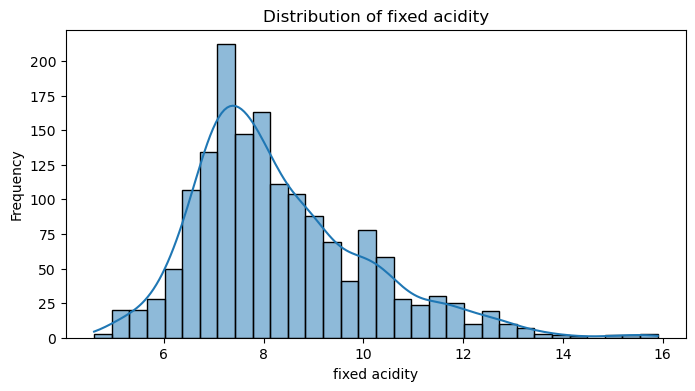

fixed acidity:
  Mean: 8.31963727329581
  Variance: 3.031416388997835
  Skewness: 0.9818292953262073 (right-skewed)
  Kurtosis: 1.1248563352037486 (platykurtic)



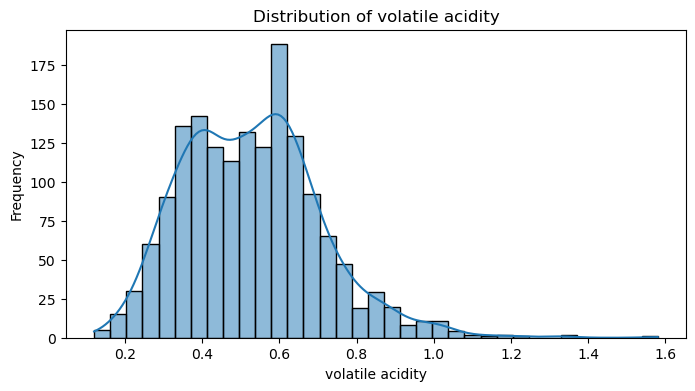

volatile acidity:
  Mean: 0.5278205128205128
  Variance: 0.03206237765155147
  Skewness: 0.6709623963499574 (right-skewed)
  Kurtosis: 1.2179633893005306 (platykurtic)



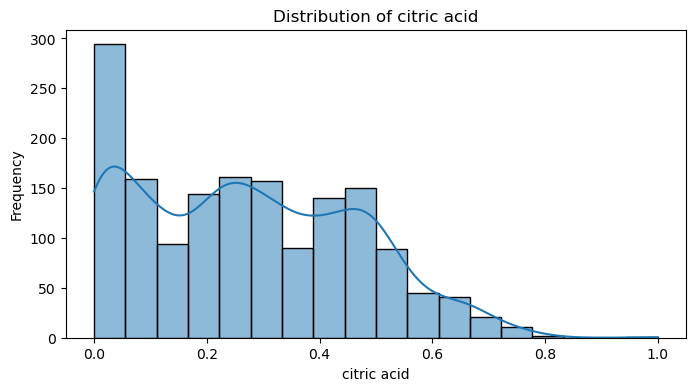

citric acid:
  Mean: 0.2709756097560976
  Variance: 0.037947483134405526
  Skewness: 0.3180385895475358 (symmetric)
  Kurtosis: -0.7902825153036646 (platykurtic)



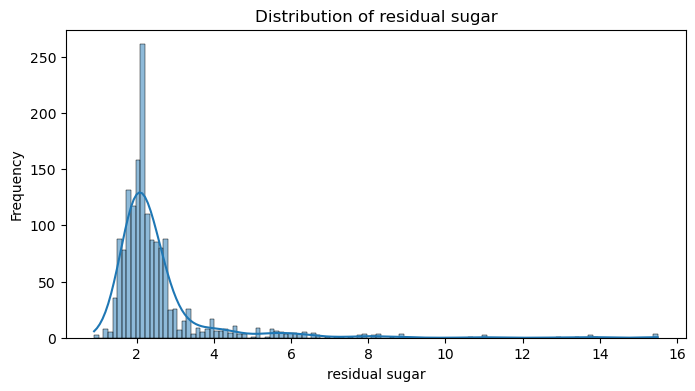

residual sugar:
  Mean: 2.53880550343965
  Variance: 1.9878971329859656
  Skewness: 4.536394788805638 (right-skewed)
  Kurtosis: 28.524437824252235 (leptokurtic)



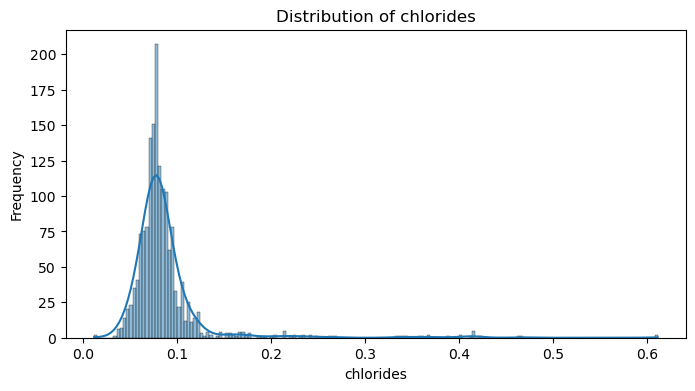

chlorides:
  Mean: 0.08746654158849279
  Variance: 0.0022151426533009964
  Skewness: 5.675016527504259 (right-skewed)
  Kurtosis: 41.581708043675775 (leptokurtic)



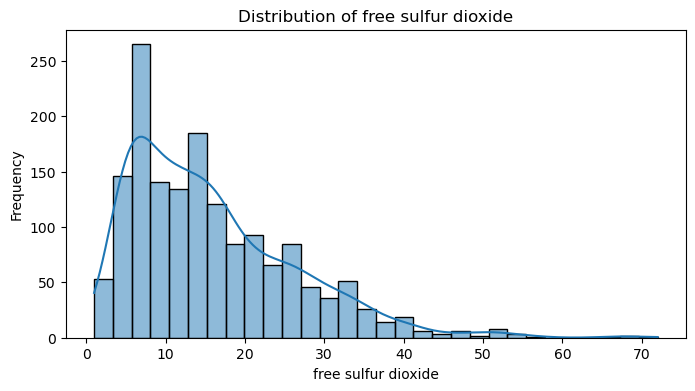

free sulfur dioxide:
  Mean: 15.874921826141339
  Variance: 109.41488383305908
  Skewness: 1.249393847434253 (right-skewed)
  Kurtosis: 2.01348999733378 (mesokurtic)



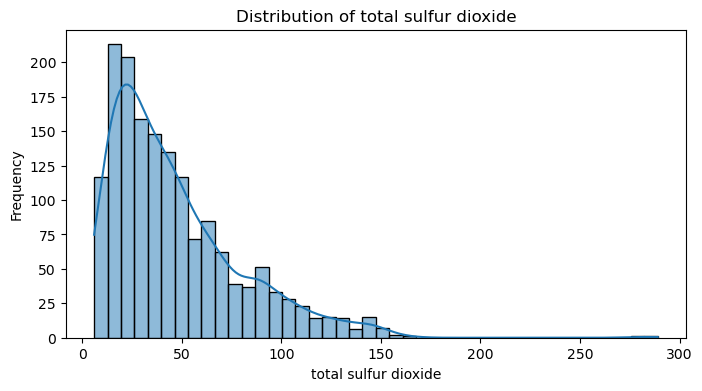

total sulfur dioxide:
  Mean: 46.46779237023139
  Variance: 1082.1023725325779
  Skewness: 1.5141091878506638 (right-skewed)
  Kurtosis: 3.7941717664905665 (mesokurtic)



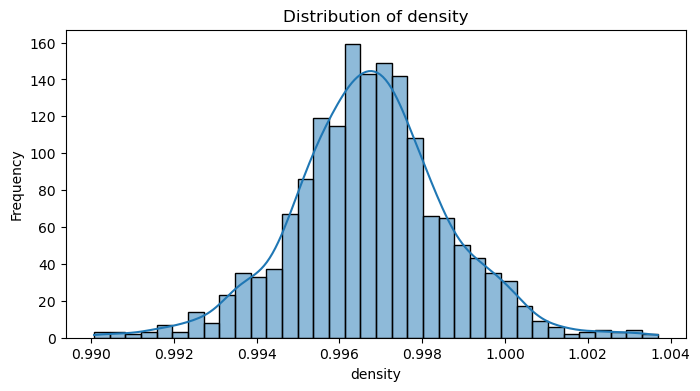

density:
  Mean: 0.9967466791744841
  Variance: 3.562029453326975e-06
  Skewness: 0.07122077153539946 (symmetric)
  Kurtosis: 0.9274107990478333 (platykurtic)



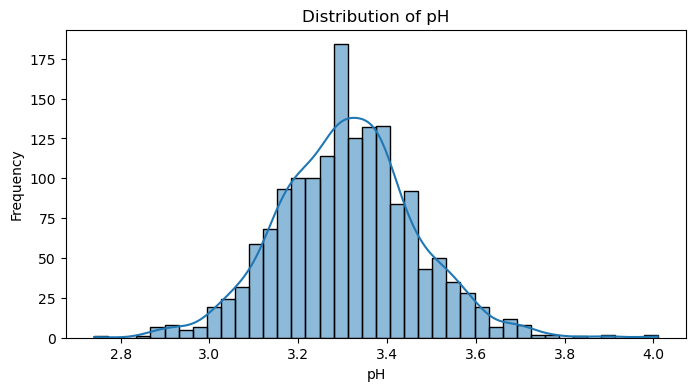

pH:
  Mean: 3.3111131957473416
  Variance: 0.023835180545412806
  Skewness: 0.19350175891005525 (symmetric)
  Kurtosis: 0.8006714441211544 (platykurtic)



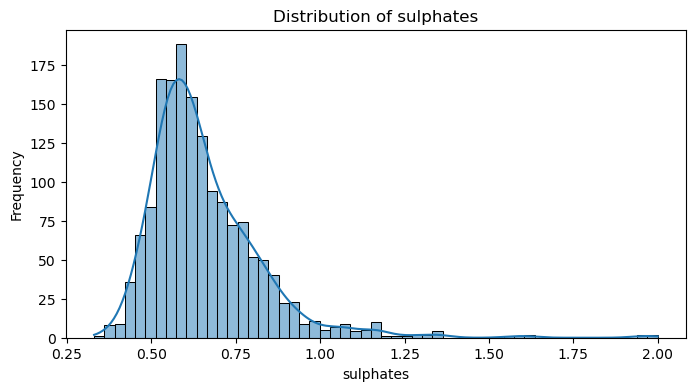

sulphates:
  Mean: 0.6581488430268917
  Variance: 0.028732616129761888
  Skewness: 2.426393455449087 (right-skewed)
  Kurtosis: 11.6798841115311 (leptokurtic)



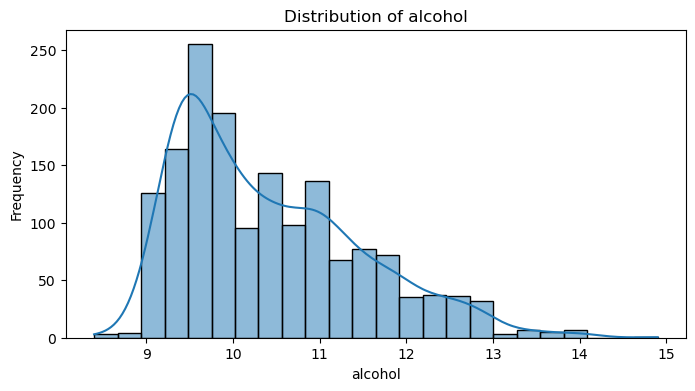

alcohol:
  Mean: 10.422983114446529
  Variance: 1.1356473950004693
  Skewness: 0.8600210646566755 (right-skewed)
  Kurtosis: 0.1956543762123122 (platykurtic)



In [11]:
chemical_properties = data.columns[:-1]  

moments = {}

for column in chemical_properties:
    # Calculate moments
    mean_val = data[column].mean()
    variance_val = data[column].var()
    skewness_val = skew(data[column])
    kurtosis_val = kurtosis(data[column])
    
    # Store results
    moments[column] = {
        "Mean": mean_val,
        "Variance": variance_val,
        "Skewness": skewness_val,
        "Kurtosis": kurtosis_val
    }
    
    # Visualization
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()
    
    # Analysis of skewness
    skew_type = "symmetric" if abs(skewness_val) < 0.5 else ("right-skewed" if skewness_val > 0 else "left-skewed")
    # Analysis of kurtosis
    kurtosis_type = "mesokurtic" if abs(kurtosis_val - 3) < 1 else ("leptokurtic" if kurtosis_val > 3 else "platykurtic")
    
    print(f"{column}:")
    print(f"  Mean: {mean_val}")
    print(f"  Variance: {variance_val}")
    print(f"  Skewness: {skewness_val} ({skew_type})")
    print(f"  Kurtosis: {kurtosis_val} ({kurtosis_type})\n")


In [13]:
# Display the calculated moments
moments_df = pd.DataFrame(moments).T
moments_df

,Mean,Variance,Skewness,Kurtosis
fixed acidity,8.319637,3.031416,0.981829,1.124856
volatile acidity,0.527821,0.032062,0.670962,1.217963
citric acid,0.270976,0.037947,0.318039,-0.790283
residual sugar,2.538806,1.987897,4.536395,28.524438
chlorides,0.087467,0.002215,5.675017,41.581708
free sulfur dioxide,15.874922,109.414884,1.249394,2.013490
total sulfur dioxide,46.467792,1082.102373,1.514109,3.794172
density,0.996747,0.000004,0.071221,0.927411
pH,3.311113,0.023835,0.193502,0.800671
sulphates,0.658149,0.028733,2.426393,11.679884
